Contextualização: Nos ultimos anos, a economia brasileira tem apresentado momentos contrastantes, alternando momentos de expansão e contração da atividade econômica. Nesse sentido, o IBGE desenvolveu três pesquisas mensais que são de fundamental importancia para o acompanhamento do ritmo de crescimento da economia, são elas a Pesquisa Mensal do Comércio (PMC), Pesquisa Mensal de Serviços (PMS) e Pesquisa Industrial Mensal - Produção Física (PIM-PF).

Utilizando a biblioteca sidrapy criada pelo IBGE, importe a série histórica dos três dados e crie um gráfico que mostre a série histórica dos 3 indicadores

OBS: Há uma grande variedade de dados que se podem baixar dentro desses indicadores, como dados month over month, year over year, etc. Nesse exercício, importamos os dados de números índices com ajuste sazonal. Ademais, também existem diversas aberturas que podem ser baixadas, nesse exercicio utilizamos o volume de vendas do varejo ampliado para a pmc, volume de serviços para a pms e industria geral para a pim
 

In [2]:
# Importar bibliotecas
import sidrapy as sidra
import pandas as pd

# PMC

In [3]:
# Coleta de dados da PMC
dados_brutos = sidra.get_table(
    table_code = "8881",
    territorial_level = "1",
    ibge_territorial_code = "all",
    variable = "7170",
    classifications = {"11046": "56736"}, # Pega dados de volume de vendas, varejo ampliado (com ajuste sazonal)
    period = "all"
)
dados_brutos

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Mês (Código),Mês,Variável (Código),Variável,Tipos de índice (Código),Tipos de índice
1,1,Brasil,30,Número-índice,47.12431,1,Brasil,200301,janeiro 2003,7170,PMC - Número-índice com ajuste sazonal (2022=100),56736,Índice de volume de vendas no comércio varejis...
2,1,Brasil,30,Número-índice,48.57653,1,Brasil,200302,fevereiro 2003,7170,PMC - Número-índice com ajuste sazonal (2022=100),56736,Índice de volume de vendas no comércio varejis...
3,1,Brasil,30,Número-índice,47.29331,1,Brasil,200303,março 2003,7170,PMC - Número-índice com ajuste sazonal (2022=100),56736,Índice de volume de vendas no comércio varejis...
4,1,Brasil,30,Número-índice,47.17616,1,Brasil,200304,abril 2003,7170,PMC - Número-índice com ajuste sazonal (2022=100),56736,Índice de volume de vendas no comércio varejis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,1,Brasil,30,Número-índice,104.08078,1,Brasil,202311,novembro 2023,7170,PMC - Número-índice com ajuste sazonal (2022=100),56736,Índice de volume de vendas no comércio varejis...
252,1,Brasil,30,Número-índice,102.68449,1,Brasil,202312,dezembro 2023,7170,PMC - Número-índice com ajuste sazonal (2022=100),56736,Índice de volume de vendas no comércio varejis...
253,1,Brasil,30,Número-índice,105.06961,1,Brasil,202401,janeiro 2024,7170,PMC - Número-índice com ajuste sazonal (2022=100),56736,Índice de volume de vendas no comércio varejis...
254,1,Brasil,30,Número-índice,106.17007,1,Brasil,202402,fevereiro 2024,7170,PMC - Número-índice com ajuste sazonal (2022=100),56736,Índice de volume de vendas no comércio varejis...


In [12]:
# Tratamendo de dados
pmc = (dados_brutos
    .rename(columns = dados_brutos.iloc[0])
    .drop(0)
    .rename(columns={"Mês (Código)":"Data"})
    .assign(
        Data = lambda x: pd.to_datetime(x.Data, format = "%Y%m"),
        Valor = lambda x: x.Valor.astype(float)
        )
)
pmc = pmc.pivot_table(columns="Variável", values="Valor", index="Data")
pmc = pmc.rename(columns={"PMC - Número-índice com ajuste sazonal (2022=100)":"PMC - SA"})
pmc

Variável,PMC - SA
Data,
2003-01-01,47.12431
2003-02-01,48.57653
2003-03-01,47.29331
2003-04-01,47.17616
2003-05-01,46.64899
...,...
2023-11-01,104.08078
2023-12-01,102.68449
2024-01-01,105.06961


# PMS

In [13]:
# Coleta de dados da PMS
dados_brutos = sidra.get_table(
    table_code = "5906",
    territorial_level = "1",
    ibge_territorial_code = "all",
    variable = "7168",
    classifications = {"11046": "56726"}, # Pega dados de volume de serviços (com ajuste sazonal)
    period = "all"
)
dados_brutos

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Mês (Código),Mês,Variável (Código),Variável,Tipos de índice (Código),Tipos de índice
1,1,Brasil,30,Número-índice,89.15232,1,Brasil,201101,janeiro 2011,7168,PMS - Número-índice com ajuste sazonal (2022=100),56726,Índice de volume de serviços
2,1,Brasil,30,Número-índice,89.19171,1,Brasil,201102,fevereiro 2011,7168,PMS - Número-índice com ajuste sazonal (2022=100),56726,Índice de volume de serviços
3,1,Brasil,30,Número-índice,88.93554,1,Brasil,201103,março 2011,7168,PMS - Número-índice com ajuste sazonal (2022=100),56726,Índice de volume de serviços
4,1,Brasil,30,Número-índice,89.71568,1,Brasil,201104,abril 2011,7168,PMS - Número-índice com ajuste sazonal (2022=100),56726,Índice de volume de serviços
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1,Brasil,30,Número-índice,102.69172,1,Brasil,202311,novembro 2023,7168,PMS - Número-índice com ajuste sazonal (2022=100),56726,Índice de volume de serviços
156,1,Brasil,30,Número-índice,103.22510,1,Brasil,202312,dezembro 2023,7168,PMS - Número-índice com ajuste sazonal (2022=100),56726,Índice de volume de serviços
157,1,Brasil,30,Número-índice,103.70421,1,Brasil,202401,janeiro 2024,7168,PMS - Número-índice com ajuste sazonal (2022=100),56726,Índice de volume de serviços
158,1,Brasil,30,Número-índice,102.77024,1,Brasil,202402,fevereiro 2024,7168,PMS - Número-índice com ajuste sazonal (2022=100),56726,Índice de volume de serviços


In [16]:
# Tratamendo de dados
pms = (dados_brutos
    .rename(columns = dados_brutos.iloc[0])
    .drop(0)
    .rename(columns={"Mês (Código)":"Data"})
    .assign(
        Data = lambda x: pd.to_datetime(x.Data, format = "%Y%m"),
        Valor = lambda x: x.Valor.astype(float)
        )
)
pms = pms.pivot_table(columns="Variável", values="Valor", index="Data")
pms = pms.rename(columns={"PMS - Número-índice com ajuste sazonal (2022=100)":"PMS - SA"})
pms

Variável,PMS - SA
Data,
2011-01-01,89.15232
2011-02-01,89.19171
2011-03-01,88.93554
2011-04-01,89.71568
2011-05-01,90.22346
...,...
2023-11-01,102.69172
2023-12-01,103.22510
2024-01-01,103.70421


# PIM

In [17]:
# Coleta de dados da PIM
dados_brutos = sidra.get_table(
    table_code = "8888",
    territorial_level = "1",
    ibge_territorial_code = "all",
    variable = "12607",
    classifications = {"544": "129314"}, # Pega dados de produção física, industria geral (com ajuste sazonal)
    period = "all"
)
dados_brutos

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Mês (Código),Mês,Variável (Código),Variável,Seções e atividades industriais (CNAE 2.0) (Có...,Seções e atividades industriais (CNAE 2.0)
1,1,Brasil,30,Número-índice,90.79220,1,Brasil,200201,janeiro 2002,12607,PIMPF - Número-índice com ajuste sazonal (2022...,129314,1 Indústria geral
2,1,Brasil,30,Número-índice,92.86861,1,Brasil,200202,fevereiro 2002,12607,PIMPF - Número-índice com ajuste sazonal (2022...,129314,1 Indústria geral
3,1,Brasil,30,Número-índice,92.32088,1,Brasil,200203,março 2002,12607,PIMPF - Número-índice com ajuste sazonal (2022...,129314,1 Indústria geral
4,1,Brasil,30,Número-índice,92.60123,1,Brasil,200204,abril 2002,12607,PIMPF - Número-índice com ajuste sazonal (2022...,129314,1 Indústria geral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,Brasil,30,Número-índice,102.46812,1,Brasil,202312,dezembro 2023,12607,PIMPF - Número-índice com ajuste sazonal (2022...,129314,1 Indústria geral
265,1,Brasil,30,Número-índice,101.26158,1,Brasil,202401,janeiro 2024,12607,PIMPF - Número-índice com ajuste sazonal (2022...,129314,1 Indústria geral
266,1,Brasil,30,Número-índice,101.38224,1,Brasil,202402,fevereiro 2024,12607,PIMPF - Número-índice com ajuste sazonal (2022...,129314,1 Indústria geral
267,1,Brasil,30,Número-índice,102.29717,1,Brasil,202403,março 2024,12607,PIMPF - Número-índice com ajuste sazonal (2022...,129314,1 Indústria geral


In [19]:
# Tratamendo de dados
pim = (dados_brutos
    .rename(columns = dados_brutos.iloc[0])
    .drop(0)
    .rename(columns={"Mês (Código)":"Data"})
    .assign(
        Data = lambda x: pd.to_datetime(x.Data, format = "%Y%m"),
        Valor = lambda x: x.Valor.astype(float)
        )
)
pim = pim.pivot_table(columns="Variável", values="Valor", index="Data")
pim = pim.rename(columns={"PIMPF - Número-índice com ajuste sazonal (2022=100)":"PIM (Produção Física - Industria Geral) - SA"})
pim

Variável,PIM (Produção Física - Industria Geral) - SA
Data,
2002-01-01,90.79220
2002-02-01,92.86861
2002-03-01,92.32088
2002-04-01,92.60123
2002-05-01,92.49790
...,...
2023-12-01,102.46812
2024-01-01,101.26158
2024-02-01,101.38224


In [21]:
# Juntando tudo em um df só
atividade = pd.concat([pmc, pms, pim], axis=1).dropna()
atividade

Variável,PMC - SA,PMS - SA,PIM (Produção Física - Industria Geral) - SA
Data,,,
2011-01-01,91.46912,89.15232,119.99281
2011-02-01,93.31305,89.19171,121.31731
2011-03-01,93.90019,88.93554,121.97482
2011-04-01,93.83727,89.71568,118.70350
2011-05-01,94.98426,90.22346,122.38685
...,...,...,...
2023-11-01,104.08078,102.69172,101.23978
2023-12-01,102.68449,103.22510,102.46812
2024-01-01,105.06961,103.70421,101.26158


# Gráfico

array([[<Axes: xlabel='Data'>],
       [<Axes: xlabel='Data'>],
       [<Axes: xlabel='Data'>]], dtype=object)

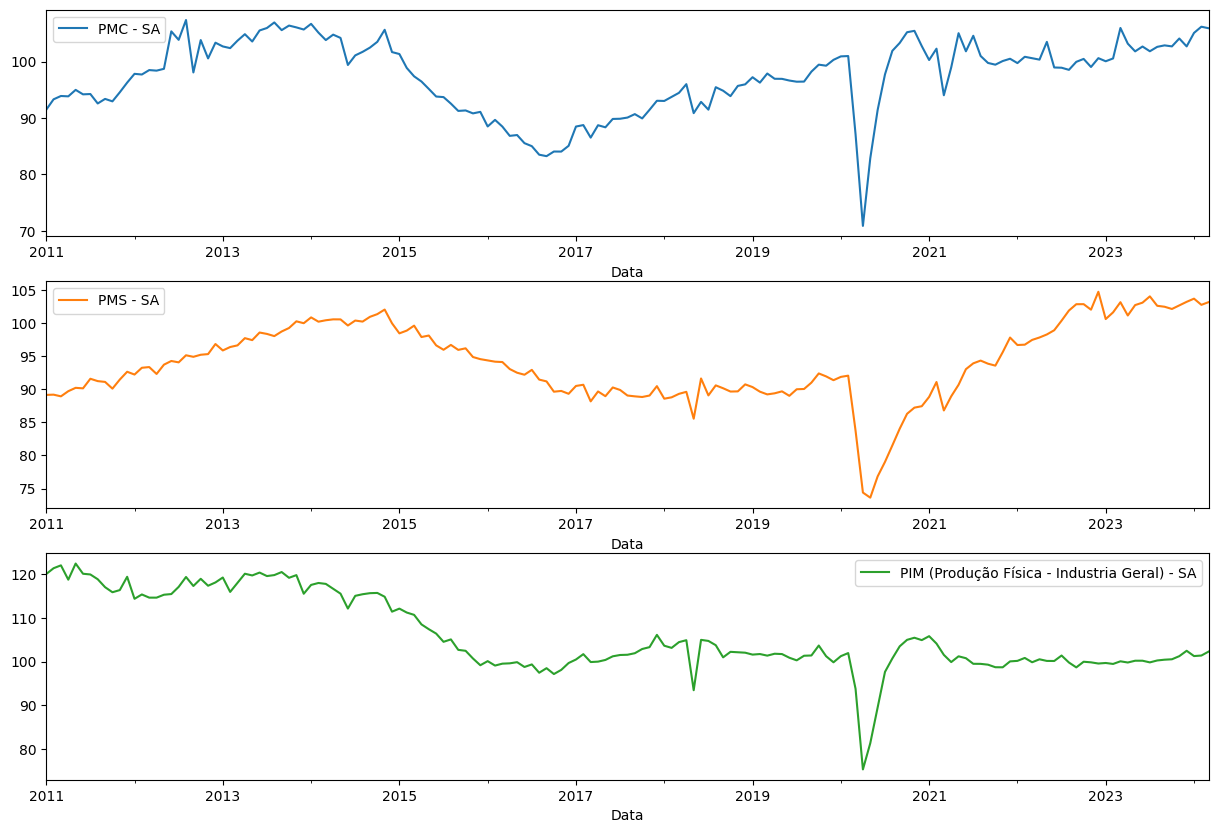

In [26]:
atividade.plot(subplots = True, layout = (3, 1), figsize = (15, 10), sharex=False)